## SECTION 1¶
Business understanding
As part of Data Science Nanodegree by Udacity to analyze market trends and opportunities,we have collected data on Airbnb listings in the Boston area. This dataset provides valuable insights into the short-term and long-term rental market in Boston, including various aspects of property listings such as location, property type, pricing, availability, and reviews.

Using the Data Science Process: CRISP-DM steps which are as follows;

Business Understanding
Data Understanding
Prepare Data
Model Data
Results
Deploy
The following are three questions about the airbnb data thta will be addressed and they are as follows;

Calculate the average price of properties in each neighborhood.

Determine the preferred neighborhoods based on the number of listings.

Analyze the types of accommodation/property clients prefer.

In [3]:
#import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the datasets
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

## SECTION 2: DATA UNDERSTANDING

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [8]:
listings_df.shape

(3818, 92)

In [9]:
listings_df.isnull()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3814,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3815,False,False,False,False,False,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True
3816,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [10]:
# Checking for missing values in the listings dataset
listings_df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [11]:
# Displaying columns with more than 50% missing values in the listings dataset
set(listings_df.columns[listings_df.isnull().mean() > 0.5])

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [12]:
# Displaying the first few rows of the calendar dataset
calendar_df.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
# Displaying the information about the calendar dataset
calendar_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [14]:
# Displaying the summary statistics of the calendar dataset
calendar_df.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [15]:
# Displaying the shape of the calendar dataset
calendar_df.shape


(1393570, 4)

In [16]:
# Checking for missing values in the calendar dataset
calendar_df.isnull().sum()


listing_id         0
date               0
available          0
price         459028
dtype: int64

In [17]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [18]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [19]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [20]:
reviews_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

# Data Preparation 

In [21]:

# breaking down date column date to month year and  day
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['day'] = calendar_df['date'].dt.day

In [22]:
# since available columns t and f wwe can simply replace them with 1 and 0
calendar_df['available'].replace({'t':1,'f':0},inplace=True)


In [23]:
# Replace '$' with an empty string and convert to numeric
calendar_df['price'] = pd.to_numeric(calendar_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

In [24]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  int64         
 3   price       934542 non-null   float64       
 4   month       1393570 non-null  int64         
 5   year        1393570 non-null  int64         
 6   day         1393570 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 74.4 MB


In [25]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [26]:
reviews_df.drop(['comments'],axis=1, inplace=True)

In [27]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [28]:
listings_df.drop(['license','notes','transit','host_about','square_feet','monthly_price','first_review','last_review'],
                 axis=1, inplace=True)

In [29]:
# Replace '$' with an empty string and convert to numeric
listings_df['price'] = pd.to_numeric(listings_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

In [30]:
# Fill missing values with the mean of each column
listings_df['review_scores_rating'].fillna(listings_df['review_scores_rating'].mean(), inplace=True)
listings_df['review_scores_accuracy'].fillna(listings_df['review_scores_accuracy'].mean(), inplace=True)
listings_df['review_scores_cleanliness'].fillna(listings_df['review_scores_cleanliness'].mean(), inplace=True)
listings_df['review_scores_checkin'].fillna(listings_df['review_scores_checkin'].mean(), inplace=True)
listings_df['review_scores_communication'].fillna(listings_df['review_scores_communication'].mean(), inplace=True)
listings_df['review_scores_location'].fillna(listings_df['review_scores_location'].mean(), inplace=True)
listings_df['review_scores_value'].fillna(listings_df['review_scores_value'].mean(), inplace=True)
listings_df['beds'].fillna(listings_df['beds'].mean(), inplace=True)
listings_df['host_identity_verified'].fillna(listings_df['host_identity_verified'].mode()[0], inplace=True)
listings_df['neighbourhood'].fillna(listings_df['neighbourhood'].mode()[0], inplace=True)
listings_df['has_availability'].fillna(listings_df['has_availability'].mode()[0], inplace=True)
listings_df['host_neighbourhood'].fillna(listings_df['host_neighbourhood'].mode()[0], inplace=True)

In [31]:
# Fill missing values for categorical columns with mode
listings_df['host_location'].fillna(listings_df['host_location'].mode()[0], inplace=True)
listings_df['host_response_time'].fillna(listings_df['host_response_time'].mode()[0], inplace=True)
listings_df['host_is_superhost'].fillna(listings_df['host_is_superhost'].mode()[0], inplace=True)

# Fill missing values for text columns with an empty string

listings_df['host_response_rate'].fillna('', inplace=True)
listings_df['host_acceptance_rate'].fillna('', inplace=True)

In [32]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  thumbnail_url                     3498 non-null   object 
 11  medium_url                        3498 non-null   object 
 12  pictur

In [33]:
listings_df.drop(['cleaning_fee','security_deposit','medium_url','thumbnail_url','space','summary'],
                 axis=1, inplace=True)

In [34]:
listings_df['review_scores_rating'].fillna(listings_df['review_scores_rating'].mean(), inplace=True)
listings_df['reviews_per_month'].fillna(listings_df['reviews_per_month'].mode()[0], inplace=True)

In [35]:
listings_df['bedrooms'].fillna(listings_df['bedrooms'].mode()[0], inplace=True)
listings_df['bathrooms'].fillna(listings_df['bathrooms'].mode()[0], inplace=True)

In [36]:
listings_df.amenities.unique()

array(['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless I

In [37]:
listings_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [38]:
listings_df.instant_bookable.unique()

array(['f', 't'], dtype=object)

## SECTION 4 : EVALUATE THE RESULTS¶
Question 3 : Type of accomodation/property clients like

In [39]:
# Extract individual amenities
listings_df['amenities'] = listings_df['amenities'].str.replace('[{}""]', '').str.split(',')


C:\Users\USER\AppData\Local\Temp\ipykernel_4020\3925991862.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_df['amenities'] = listings_df['amenities'].str.replace('[{}""]', '').str.split(',')


In [40]:
# Create a DataFrame with amenities count
amenity_counts = {}
for amenities in listings_df['amenities']:
    for amenity in amenities:
        if amenity in amenity_counts:
            amenity_counts[amenity] += 1
        else:
            amenity_counts[amenity] = 1

In [41]:
# Sort amenities by frequency and select top 15
top_amenities = sorted(amenity_counts.items(), key=lambda x: x[1], reverse=True)[:16]


In [42]:
# Create a DataFrame with top 15 amenities and other property features
top_amenities_df = pd.DataFrame(top_amenities, columns=['amenity', 'count'])

In [43]:
top_amenities_df.head

<bound method NDFrame.head of                      amenity  count
0          Wireless Internet   3667
1                    Heating   3627
2                    Kitchen   3423
3             Smoke Detector   3281
4                 Essentials   3237
5                      Dryer   2997
6                     Washer   2992
7                   Internet   2811
8                    Shampoo   2670
9                         TV   2574
10  Carbon Monoxide Detector   2485
11         Fire Extinguisher   2196
12  Free Parking on Premises   2167
13       Family/Kid Friendly   1963
14             First Aid Kit   1680
15                  Cable TV   1446>

In [44]:
# Room Type Analysis
room_type_counts = listings_df['room_type'].value_counts()
average_price_by_room_type = listings_df.groupby('room_type')['price'].mean().sort_values(ascending=False)


In [45]:
# Bathroom Analysis
bathroom_counts = listings_df['bathrooms'].value_counts()
average_price_by_bathroom = listings_df.groupby('bathrooms')['price'].mean().sort_values(ascending=False)

# Bedroom Analysis
bedroom_counts = listings_df['bedrooms'].value_counts()
average_price_by_bedroom = listings_df.groupby('bedrooms')['price'].mean().sort_values(ascending=False)

# Bed Analysis
bed_counts = listings_df['beds'].value_counts()
average_price_by_bed = listings_df.groupby('beds')['price'].mean().sort_values(ascending=False)


<module 'matplotlib.pyplot' from 'C:\\Users\\USER\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

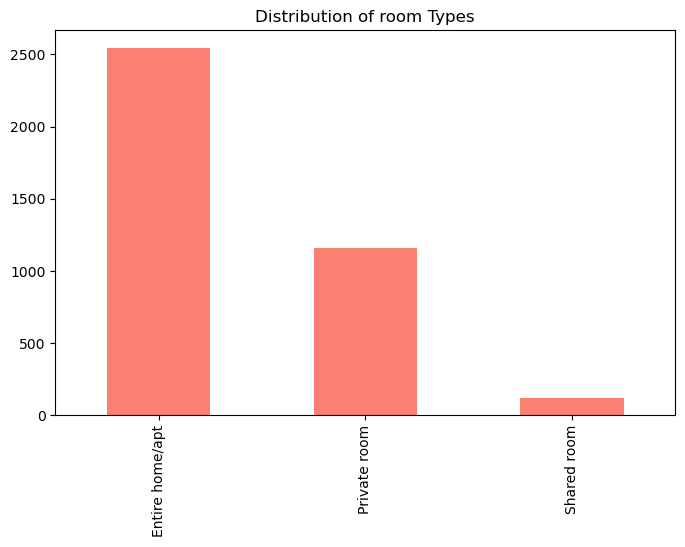

In [48]:
# Room Type Distribution

plt.figure(figsize=(8, 5))
room_type_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of room Types')
plt

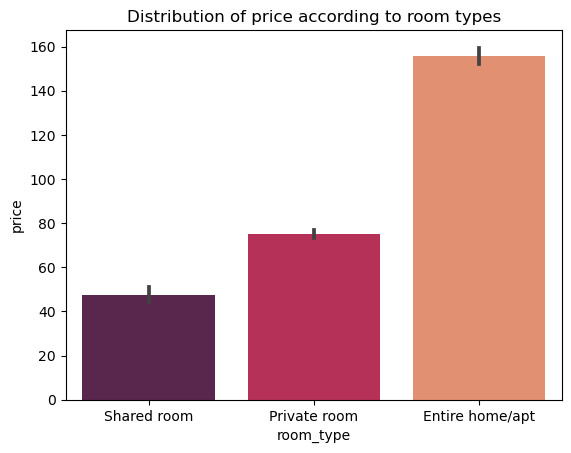

In [49]:
result = listings_df.groupby(['room_type'])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y = 'price', data = listings_df, order = result['room_type'], 
            palette='rocket')
plt.title('Distribution of price according to room types')
plt.show()

## Conclusion:¶
Understanding the types of accommodation clients prefer helps hosts tailor their offerings to meet demand. By examining the property types in the Boston Airbnb data, we gained valuable insights:

Preferred Property Types: Entire rental unit, such as apartments, houses, and condominiums, are popular among guests.

Amenities: Guests often look for accommodations with specific amenities, such as Wi-Fi, air conditioning, and parking

facilities. Hosts can enhance their listings by providing these amenities like parking spaces and kitchen.

price: The affordability of the accomodation will be thoroughly be considered while exploring different accomodation.


Based on the data it's usualy   on average a one bedroom and a one bathroom with the following amenities like Wireless Internet,Heating,Kitchen,Smoke Detector,Essentials,Dryer,Washer,Shampoo,Carbon Monoxide Detector,Fire Extinguisher,Free Parking on Premises,First Aid Kit,Cable TV seems to be enough for clients.

# Question 2
 Determine the preferred neighborhoods based on the number of listings.

In [50]:
neighbourhood_counts = listings_df['neighbourhood'].value_counts()

In [51]:
# Identify the top most preferred neighbourhoods
top_neighbourhoods = neighbourhood_counts.head(5)
print("Top 5 common preferred neighourhood types:")
print(top_neighbourhoods)

Top 5 common preferred neighourhood types:
Capitol Hill    767
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64


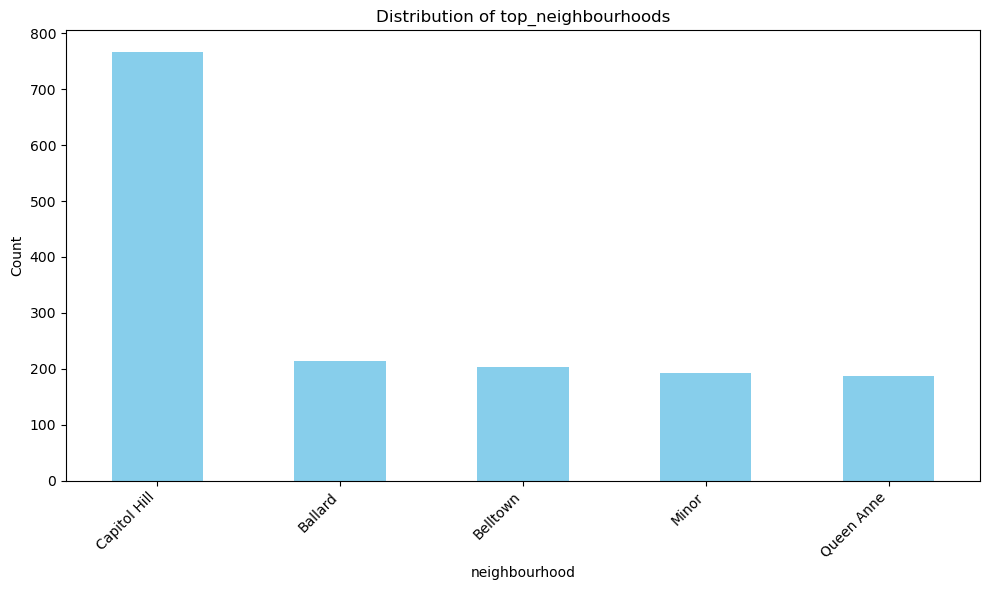

In [52]:
# Visualize the distribution of property types
plt.figure(figsize=(10, 6))
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Distribution of top_neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
# Group by neighbourhood and calculate median price
median_price_by_neighbourhood = listings_df.groupby(['neighbourhood'])['price'].median().reset_index()

In [54]:
# Sort the result by median price
median_price_by_neighbourhood = median_price_by_neighbourhood.sort_values('price')


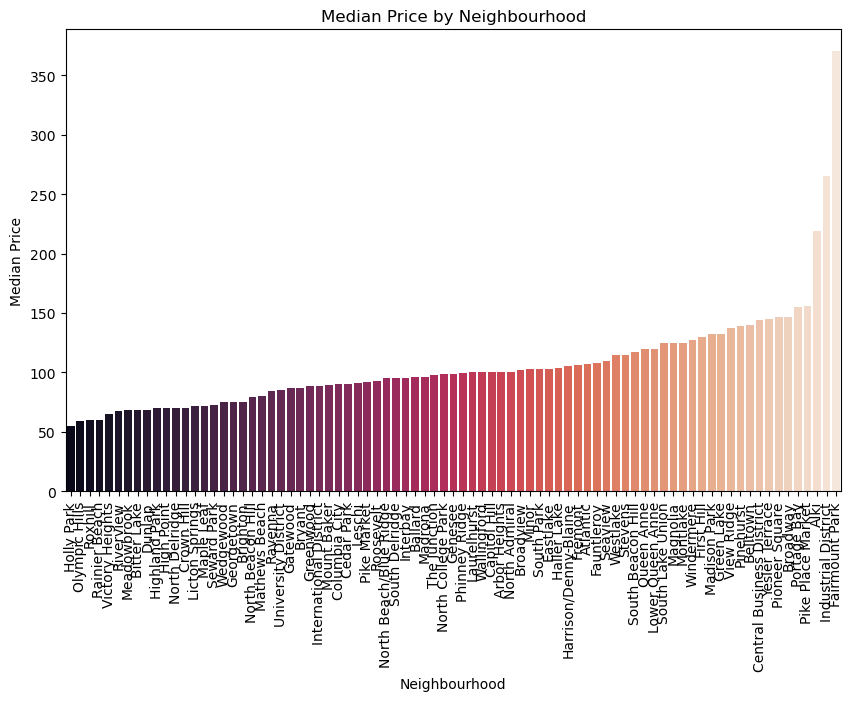

In [55]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='price', data=median_price_by_neighbourhood,
            order=median_price_by_neighbourhood['neighbourhood'], palette='rocket')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price')
plt.title('Median Price by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

In [56]:
# Group by neighbourhood and calculate mean and median ratings
mean_rating_by_neighbourhood = listings_df.groupby('neighbourhood')['review_scores_rating'].mean().reset_index()
median_rating_by_neighbourhood = listings_df.groupby('neighbourhood')['review_scores_rating'].median().reset_index()


In [57]:
# Sort the results by neighbourhood names
mean_rating_by_neighbourhood = mean_rating_by_neighbourhood.sort_values('neighbourhood')
median_rating_by_neighbourhood = median_rating_by_neighbourhood.sort_values('neighbourhood')

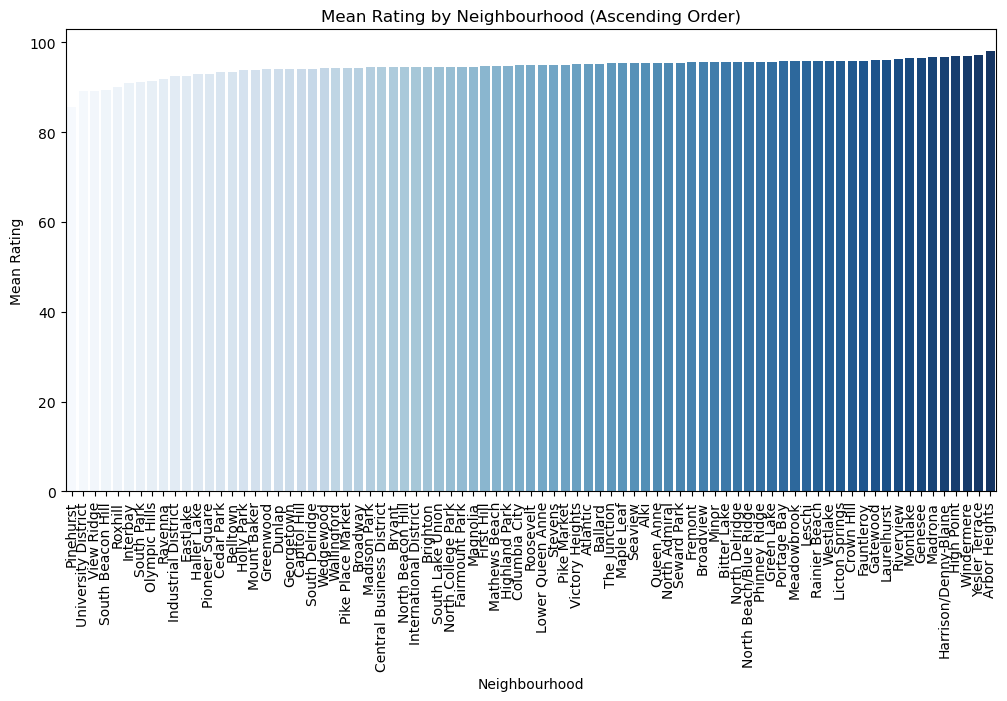

In [58]:
# Sort the DataFrame by mean rating in ascending order
mean_rating_by_neighbourhood_sorted = mean_rating_by_neighbourhood.sort_values(by='review_scores_rating')


# Plotting mean ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood', y='review_scores_rating', data=mean_rating_by_neighbourhood_sorted, palette='Blues')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Neighbourhood (Ascending Order)')
plt.xticks(rotation=90)
plt.show()

## Conclusion:¶
-Neighborhoods with both high mean and median ratings are consistently desirable areas, providing high-quality experiences across listings.

-High mean ratings with lower median ratings might suggest some exceptional properties but a more varied experience overall.

-High median ratings with lower mean ratings indicate consistent satisfaction across most listings, even if some outliers drag down the mean.

-After examining the average prices in each neighborhood, it's clear that some areas are more preferred than others. Neighborhoods like downtown, south end and back bay stand out for their higher average prices, indicating greater desirability among clients. Understanding these preferred neighborhoods helps property owners target their investments more effectively.

## Question 1¶
The price range of between different neighbourhoods and average price of property in the neighbourhoods

In [59]:
# Calculate price range between neighborhoods
price_range = listings_df.groupby('neighbourhood')['price'].apply(lambda x: np.max(x) - np.min(x))

In [60]:
# Calculate average price of properties in each neighborhood
average_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].mean()


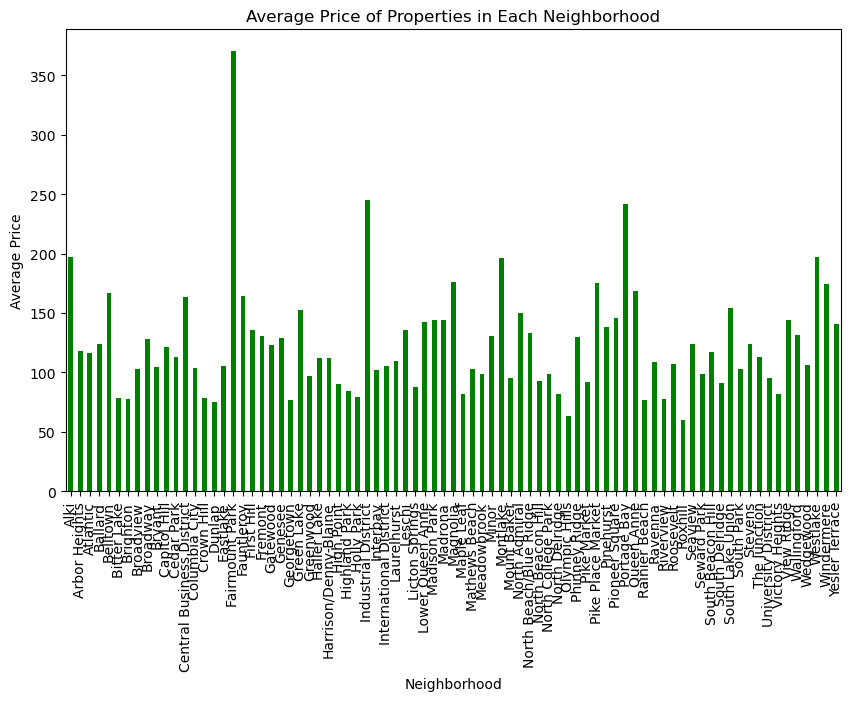

In [61]:
# Plot average price of properties in each neighborhood
plt.figure(figsize=(10, 6))
average_price_by_neighborhood.plot(kind='bar', color='green')
plt.title('Average Price of Properties in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()



In [77]:
# Calculate price range between neighborhoods
price_range = listings_df.groupby('neighbourhood')['price'].apply(lambda x: np.max(x) - np.min(x))

# Find the most expensive neighborhood
most_expensive_neighborhood = price_range.idxmax()
most_expensive_price = price_range.max()

# Calculate average price of properties in each neighborhood
average_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].mean()

# Print results
print("Price range between neighborhoods:")
print(price_range)

print("\nMost expensive neighborhood:", most_expensive_neighborhood)
print("Average price in", most_expensive_neighborhood, "neighborhood:", most_expensive_price)
print("\nAverage price of properties in each neighborhood:")
print(average_price_by_neighborhood)

Price range between neighborhoods:
neighbourhood
Alki              320.0
Arbor Heights     146.0
Atlantic          250.0
Ballard           450.0
Belltown          964.0
                  ...  
Wallingford       536.0
Wedgewood         251.0
Westlake          710.0
Windermere        315.0
Yesler Terrace    180.0
Name: price, Length: 81, dtype: float64

Most expensive neighborhood: Ravenna
Average price in Ravenna neighborhood: 972.0

Average price of properties in each neighborhood:
neighbourhood
Alki              196.652174
Arbor Heights     118.000000
Atlantic          116.280000
Ballard           123.615023
Belltown          166.627451
                     ...    
Wallingford       131.335664
Wedgewood         106.666667
Westlake          197.000000
Windermere        174.700000
Yesler Terrace    141.083333
Name: price, Length: 81, dtype: float64


In [67]:
# Calculate the cheapest neighborhood
cheapest_neighborhood = average_price_by_neighborhood.idxmin()
cheapest_price = average_price_by_neighborhood.min()

print("The cheapest neighborhood is:", cheapest_neighborhood)
print("Average price in the cheapest neighborhood:", cheapest_price)

The cheapest neighborhood is: Roxhill
Average price in the cheapest neighborhood: 60.0


In [69]:
# Calculate the average price of properties in each neighborhood
average_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].mean()

# Determine the price range between different neighborhoods
min_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].min()
max_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].max()
price_range_by_neighborhood = max_price_by_neighborhood - min_price_by_neighborhood

# Print results
print("Average price of properties in each neighborhood:")
print(average_price_by_neighborhood)
print("\nPrice range between neighborhoods:")
print(price_range_by_neighborhood)

Average price of properties in each neighborhood:
neighbourhood
Alki              196.652174
Arbor Heights     118.000000
Atlantic          116.280000
Ballard           123.615023
Belltown          166.627451
                     ...    
Wallingford       131.335664
Wedgewood         106.666667
Westlake          197.000000
Windermere        174.700000
Yesler Terrace    141.083333
Name: price, Length: 81, dtype: float64

Price range between neighborhoods:
neighbourhood
Alki              320.0
Arbor Heights     146.0
Atlantic          250.0
Ballard           450.0
Belltown          964.0
                  ...  
Wallingford       536.0
Wedgewood         251.0
Westlake          710.0
Windermere        315.0
Yesler Terrace    180.0
Name: price, Length: 81, dtype: float64


In [76]:
# Calculate the average price of properties in each neighborhood
average_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].mean().sort_values()

# Determine the price range between different neighborhoods
min_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].min()
max_price_by_neighborhood = listings_df.groupby('neighbourhood')['price'].max()
price_range_by_neighborhood = max_price_by_neighborhood - min_price_by_neighborhood

# Print results
print("Average price of properties in each neighborhood (sorted):")
print(average_price_by_neighborhood.head(50))
print("\nPrice range between neighborhoods:")
print(price_range_by_neighborhood.head(50))


Average price of properties in each neighborhood (sorted):
neighbourhood
Roxhill                    60.000000
Olympic Hills              63.666667
Dunlap                     75.461538
Rainier Beach              76.722222
Georgetown                 77.000000
Riverview                  77.375000
Brighton                   78.000000
Crown Hill                 78.666667
Bitter Lake                78.846154
Holly Park                 79.166667
Victory Heights            81.769231
North Delridge             81.777778
Maple Leaf                 81.853659
Highland Park              84.500000
Licton Springs             87.750000
High Point                 90.090909
South Delridge             91.428571
Pike Market                92.000000
North Beacon Hill          92.652632
Mount Baker                95.000000
University District        95.420561
Greenwood                  97.037975
Seward Park                98.562500
Meadowbrook                98.666667
North College Park         99.000000
In

In [73]:
# Identify the top most preferred neighbourhoods
top_neighbourhoods = neighbourhood_counts.head(20)
print("top 20 neigbourhoods with the most properties:")
print(top_neighbourhoods)

top 20 neigbourhoods with the most properties:
Capitol Hill                 767
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Atlantic                      50
Name: neighbourhood, dtype: int64


## Conclusion¶
Understanding the average price of properties in different neighborhoods is crucial for both hosts and guests. It helps hosts set competitive prices, and it allows guests to choose accommodations that fit their budget. By analyzing the Boston Airbnb data, we’ve calculated the average price of properties in each neighborhood. Here are some highlights:

Most expensive neighborhood: Ravenna Average price in Ravenna neighborhood: $ 972.0.

Preferred Neighborhoods: North Beacon Hill and Greenwood, with a high number of listings and relatively affordable prices.

Price Range Across Neighborhoods: The average price varies across different neighborhoods, ranging from  Roxhill $ 60 to Fairmount Park $ 370
  248 .